<p align="center" style="font-size:24px;"><strong>ADDRESSING BIAS IN IBM HR ANALYTICS EMPLOYEE ATTRITION & PERFORMANCE DATASET</strong></p>



***KEY CONCEPTS:***

1. ***BIAS EVALUATION AND REDUCTION - Naive,Representative and Fair Implementation.***
2. ***PRIVACY PRESERVING - Fair Model with Noise and Different Epsilon Values (Differential Privacy) and Anonymity***

***Dataset used: IBM HR Analytics Employee Attrition & Performance dataset page on Kaggle.***

***LOAD THE DATASET***

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/aswathkumarkulasekarapandian/Downloads/WA_Fn-UseC_-HR-Employee-Attrition 2.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


***SUMMARY STATISTICS***

In [71]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


***MISSING VALUES***

In [72]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

***VISUALIZATION FOR AGE,GENDER AND ATTRITION DISTRIBUTION***

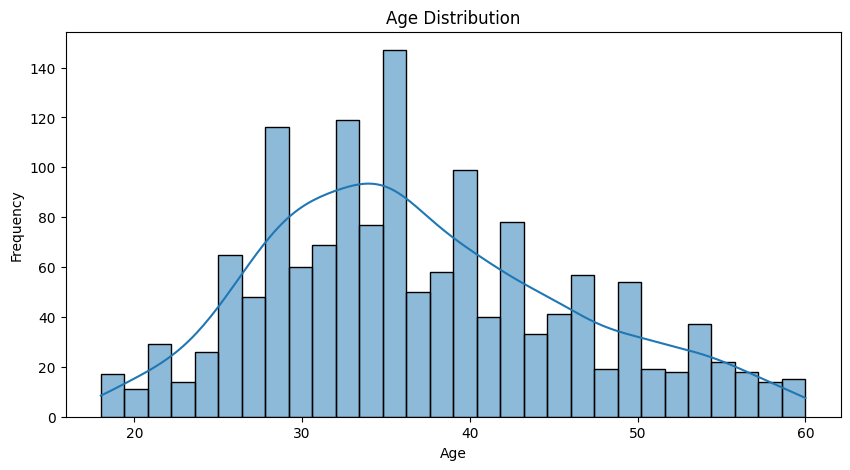

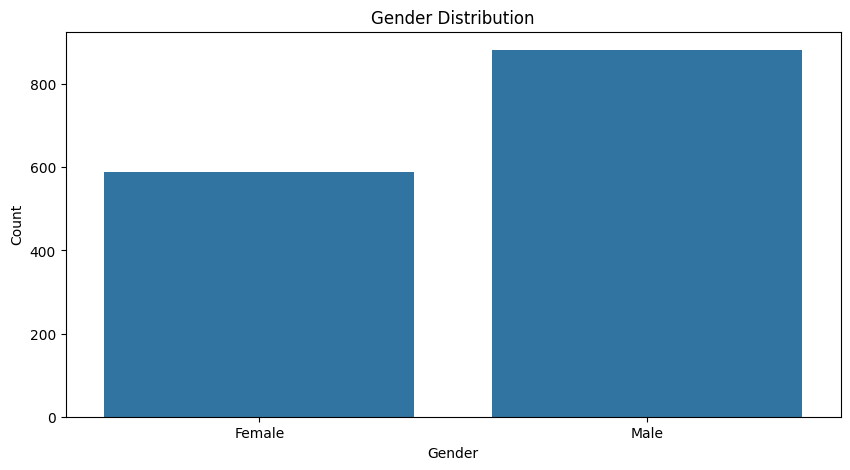

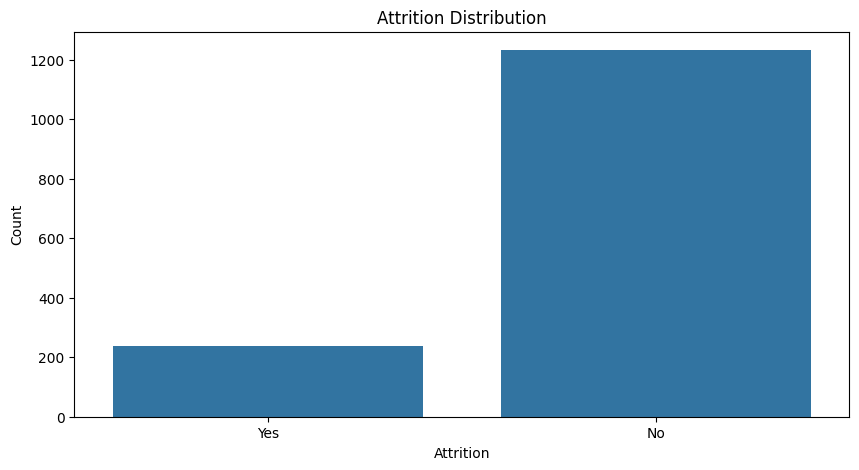

In [73]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for Attrition
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


***VIZUALIZATIONS FOR AGE AND GENDER BY ATTRITION STATUS***

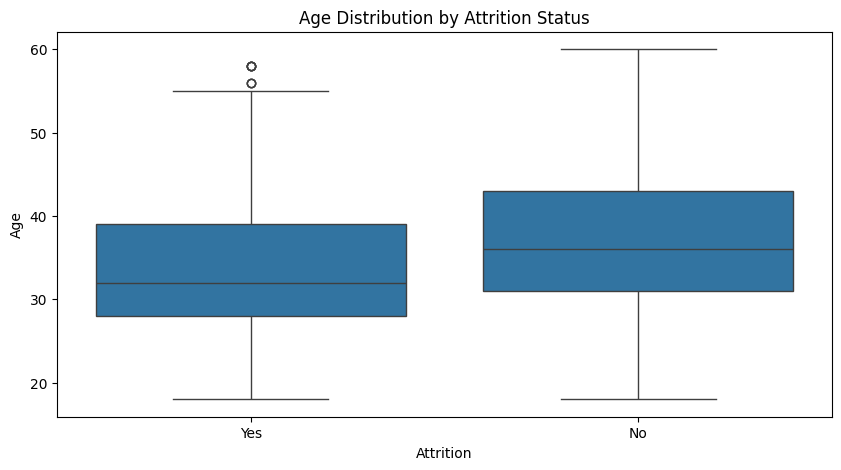

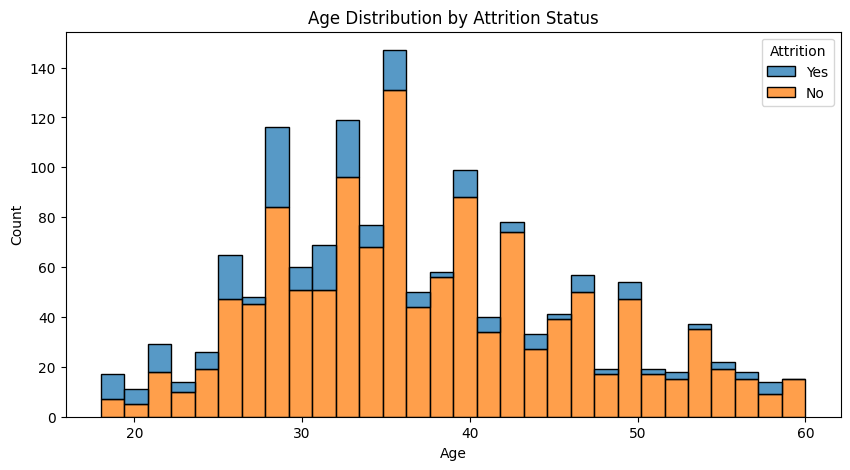

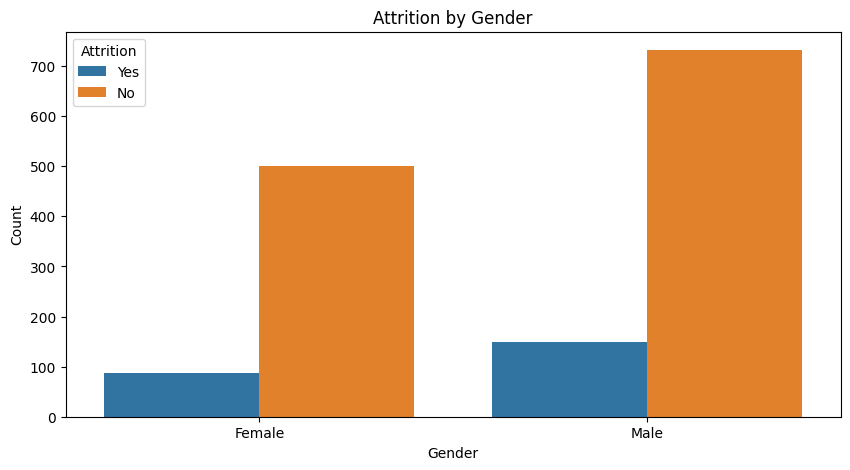

In [74]:
# Box plot of Age by Attrition status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# Histogram of Age by Attrition status
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=30)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Attrition by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


***SENSITIVE ATTRIBUTE AND TARGET***

Age displays a more nuanced relationship with attrition, with different age groups showing varying levels of attrition.
This suggests that age could be a more significant factor in determining bias in the dataset compared to gender.

Attrition is chosen as the target variable because understanding and predicting employee turnover is crucial for organizational planning and performance improvement.

***CHI-SQUARE TEST FOR ASSOCIATION BETWEEN FEATURES AND ATTRITION***

In [75]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/Users/aswathkumarkulasekarapandian/Downloads/WA_Fn-UseC_-HR-Employee-Attrition 2.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Function to perform chi-square test
def chi_square_test(feature, target='Attrition'):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# List of potential sensitive features
sensitive_features = ['Age', 'Gender', 'Department', 'EducationField', 'MaritalStatus']

# Calculate p-values for each feature
chi_square_results = {feature: chi_square_test(feature) for feature in sensitive_features}

# Display the p-values to determine which features are significantly associated with attrition
chi_square_results

{'Age': 2.5758529842770494e-09,
 'Gender': 0.29057244902890855,
 'Department': 0.004525606574479633,
 'EducationField': 0.006773980139025212,
 'MaritalStatus': 9.45551106034083e-11}

***AGE AS SENSITIVE ATTRIBUTE***

***Interpretation:***
Age (2.5758529842770494e-09): The p-value is very small (much less than 0.05), indicating a significant association between age and attrition.
Gender (0.29057244902890855): The p-value is greater than 0.05, indicating no significant association between gender and attrition.
Department (0.004525606574479633): The p-value is less than 0.05, indicating a significant association between department and attrition.
EducationField (0.006773980139025212): The p-value is less than 0.05, indicating a significant association between education field and attrition.
MaritalStatus (9.45551106034083e-11): The p-value is very small (much less than 0.05), indicating a significant association between marital status and attrition.

***Conclusion:***
Age, Department, EducationField, and MaritalStatus have significant associations with attrition.
Gender does not have a significant association with attrition based on the chi-square test.
Therefore, age can be considered a suitable sensitive attribute for bias detection and mitigation in this dataset, as it shows a significant association with attrition.

***TARGET:***
Attrition is chosen as the target variable because understanding and predicting employee turnover is crucial for organizational planning and performance improvement.


***DEFINING FAIRNESS MATRICS***

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Load the dataset
file_path = '/Users/aswathkumarkulasekarapandian/Downloads/WA_Fn-UseC_-HR-Employee-Attrition 2.csv'
df = pd.read_csv(file_path)

# Preprocessing
sensitive_attr = 'Age'
target = 'Attrition'

df[target] = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

df['Sensitive'] = df[sensitive_attr].apply(lambda x: 1 if x < 40 else 0)

df = df.drop(columns=[sensitive_attr, 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=[target, 'Sensitive'])
y = df[target]
sensitive = df['Sensitive']

X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(X, y, sensitive, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def disparate_impact_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)

    selection_rate_privileged = sum(y_pred[privileged]) / sum(privileged)
    selection_rate_unprivileged = sum(y_pred[unprivileged]) / sum(unprivileged)

    if selection_rate_privileged == 0:
        return float('inf')

    disparate_impact = selection_rate_unprivileged / selection_rate_privileged
    return disparate_impact

def zemel_fairness_scorer(y_true, y_pred, sensitive_attr):
    diff = abs(sum(y_pred[sensitive_attr == 1]) / sum(sensitive_attr == 1) - sum(y_pred[sensitive_attr == 0]) / sum(sensitive_attr == 0))
    return diff

def BER_scorer(y_true, y_pred):
    recall_pos = recall_score(y_true, y_pred, pos_label=1)
    recall_neg = recall_score(y_true, y_pred, pos_label=0)
    BER = 0.5 * ((1 - recall_pos) + (1 - recall_neg))
    return BER


***NAIVE IMPLEMENTATION***

In [77]:
from sklearn.metrics import confusion_matrix, roc_auc_score
naive_model = LogisticRegression()
naive_model.fit(X_train, y_train)
y_pred_naive = naive_model.predict(X_test)
accuracy_naive = accuracy_score(y_test, y_pred_naive)
disparate_impact_naive = disparate_impact_scorer(y_test, y_pred_naive, sensitive_test)
zemel_fairness_naive = zemel_fairness_scorer(y_test, y_pred_naive, sensitive_test)
BER_naive = BER_scorer(y_test, y_pred_naive)
# Print the results
print("Naive Model:")
print(f"Accuracy: {accuracy_naive}")
print(f"Disparate Impact: {disparate_impact_naive}")
print(f"Zemel Fairness: {zemel_fairness_naive}")
print(f"Balanced Error Rate: {BER_naive}")
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred_naive).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
auc1 = roc_auc_score(y_test, y_pred_naive)
print("Naive Model Results:")
print("True Positives (TP):", tp1)
print("False Positives (FP):", fp1)
print("True Negatives (TN):", tn1)
print("False Negatives (FN):", fn1)
print("Sensitivity:", sensitivity1)
print("Specificity:", specificity1)
print("Area Under the ROC Curve (AUC):", auc1)


Naive Model:
Accuracy: 0.8820861678004536
Disparate Impact: 2.169550173010381
Zemel Fairness: 0.06155527226370425
Balanced Error Rate: 0.30359725923106207
Naive Model Results:
True Positives (TP): 30
False Positives (FP): 11
True Negatives (TN): 359
False Negatives (FN): 41
Sensitivity: 0.4225352112676056
Specificity: 0.9702702702702702
Area Under the ROC Curve (AUC): 0.6964027407689378


***REPRESENTATIVE IMPLEMENTATION***

In [78]:
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, roc_auc_score
my_scorer = make_scorer(BER_scorer, greater_is_better=False)

# Define your model
model = LogisticRegression()

# Grid search for class weights
param_grid = {
    'class_weight': [{0: 1, 1: w} for w in np.linspace(0.5, 2.0, 10)]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=my_scorer, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
disparate_impact = disparate_impact_scorer(y_test, y_pred, sensitive_test)
zemel_fairness = zemel_fairness_scorer(y_test, y_pred, sensitive_test)
ber = BER_scorer(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Best class weights:", grid_search.best_params_)

print("Representative Model with Optimized Sample Weights:")
print("Accuracy:", accuracy)
print("Disparate Impact:", disparate_impact)
print("Zemel Fairness:", zemel_fairness)
print("Balanced Error Rate:", ber)

print("Representative Model Results with Optimized Sample Weights:")
print("True Positives (TP):", sum((y_test == 1) & (y_pred == 1)))
print("False Positives (FP):", sum((y_test == 0) & (y_pred == 1)))
print("True Negatives (TN):", sum((y_test == 0) & (y_pred == 0)))
print("False Negatives (FN):", sum((y_test == 1) & (y_pred == 0)))
print("Sensitivity:", recall_score(y_test, y_pred, pos_label=1))
print("Specificity:", recall_score(y_test, y_pred, pos_label=0))
print("Area Under the ROC Curve (AUC):", auc)

Best class weights: {'class_weight': {0: 1, 1: 2.0}}
Representative Model with Optimized Sample Weights:
Accuracy: 0.8571428571428571
Disparate Impact: 2.1038062283737027
Zemel Fairness: 0.10166636313968312
Balanced Error Rate: 0.2672440045679482
Representative Model Results with Optimized Sample Weights:
True Positives (TP): 39
False Positives (FP): 31
True Negatives (TN): 339
False Negatives (FN): 32
Sensitivity: 0.5492957746478874
Specificity: 0.9162162162162162
Area Under the ROC Curve (AUC): 0.7327559954320518


***FAIR IMPLEMNTATION***

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Define custom scorer functions
def disparate_impact_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    selection_rate_privileged = np.sum(y_pred[privileged]) / np.clip(np.sum(privileged), 1e-10, None)
    selection_rate_unprivileged = np.sum(y_pred[unprivileged]) / np.clip(np.sum(unprivileged), 1e-10, None)
    if selection_rate_privileged == 0:
        return float('inf')
    disparate_impact = selection_rate_unprivileged / selection_rate_privileged
    if not np.isfinite(disparate_impact):
        disparate_impact = 0  # Set to a default value if not finite
    return disparate_impact

def zemel_fairness_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    privileged_acc = np.mean(y_pred[privileged] == y_true[privileged])
    unprivileged_acc = np.mean(y_pred[unprivileged] == y_true[unprivileged])
    zemel_fairness = abs(privileged_acc - unprivileged_acc)
    if not np.isfinite(zemel_fairness):
        zemel_fairness = 0  # Set to a default value if not finite
    return zemel_fairness

class CombinedScorer(BaseEstimator, TransformerMixin):
    def __init__(self, sensitive_attr):
        self.sensitive_attr = sensitive_attr

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def _disparate_impact_scorer(self, y_true, y_pred, sensitive_attr):
        return disparate_impact_scorer(y_true, y_pred, sensitive_attr)

    def _combined_score(self, y_true, y_pred, sensitive_attr):
        accuracy = accuracy_score(y_true, y_pred)
        di = self._disparate_impact_scorer(y_true, y_pred, sensitive_attr)
        fairness_penalty = max(0, abs(1 - di) - 0.05)  # Adjusted threshold for disparate impact penalty
        return accuracy - fairness_penalty

    def score(self, estimator, X, y):
        y_pred = estimator.predict(X)
        sensitive_attr_subset = self.sensitive_attr.iloc[X.index]
        combined_score = self._combined_score(y, y_pred, sensitive_attr_subset)
        if not np.isfinite(combined_score):
            combined_score = 0  # Set to a default value if not finite
        return np.nan_to_num(combined_score)  # Replace NaNs with zero

# Assuming X_train and X_test were originally DataFrames with known column names
original_feature_names = [f'feature{i}' for i in range(X_train.shape[1])]  # Replace with actual feature names if known

# Feature Engineering: Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Prepare the dataset
feature_columns = poly.get_feature_names_out(input_features=original_feature_names)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_train_scaled_df['Sensitive'] = sensitive_train.reset_index(drop=True)
dataset = BinaryLabelDataset(
    favorable_label=0, 
    unfavorable_label=1, 
    df=pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1), 
    label_names=[target], 
    protected_attribute_names=['Sensitive']
)

# Apply Reweighing
RW = Reweighing(
    unprivileged_groups=[{'Sensitive': 1}], 
    privileged_groups=[{'Sensitive': 0}]
)
RW.fit(dataset)
dataset_transf = RW.transform(dataset)

# Prepare transformed features//extracts transformed features after reweighing
features_transf = pd.DataFrame(dataset_transf.features, columns=dataset_transf.feature_names)

# Hyperparameter tuning for Logistic Regression with class weights and combined scorer
combined_scorer = CombinedScorer(sensitive_train)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 5000],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring=combined_scorer.score)
grid_search.fit(features_transf, dataset_transf.labels.ravel(), sample_weight=dataset_transf.instance_weights)

best_model = grid_search.best_estimator_

# Ensure the transformation for X_test matches the training data
X_test_transf = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_transf)

# Add the 'Sensitive' column to the test set to match the training set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns)
X_test_scaled_df['Sensitive'] = sensitive_test.reset_index(drop=True)

# Predict on the test set
y_pred = best_model.predict(X_test_scaled_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix and extract TP, FP, TN, FN
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate AUC
y_prob = best_model.predict_proba(X_test_scaled_df)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Calculate Disparate Impact
di = disparate_impact_scorer(y_test, y_pred, sensitive_test)

# Calculate Zemel Fairness
zemel_fairness = zemel_fairness_scorer(y_test, y_pred, sensitive_test)

# Summarize Fair Model Results
print("\nFair Model with Combined Grid Search:")
print(f"Best Threshold: {grid_search.best_params_['C']}")
print(f"Accuracy: {accuracy}")
print(f"Disparate Impact: {di}")
print(f"Zemel Fairness: {zemel_fairness}")
print("Fair Model Results:")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Area Under the ROC Curve (AUC): {auc}")



Fair Model with Combined Grid Search:
Best Threshold: 10
Accuracy: 0.7528344671201814
Disparate Impact: 0.8565496786950074
Zemel Fairness: 0.02440356947732658
Fair Model Results:
True Positives (TP): 27
False Positives (FP): 65
True Negatives (TN): 305
False Negatives (FN): 44
Sensitivity: 0.38028169014084506
Specificity: 0.8243243243243243
Area Under the ROC Curve (AUC): 0.597601827179292


***FAIR MODEL WITH NOISE AND DIFFERENT EPSILON VALUE (Differential privacy)***

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Define custom scorer functions
def disparate_impact_scorer(y_true, y_pred, sensitive_attr, epsilon=1e-6):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    selection_rate_privileged = (np.sum(y_pred[privileged]) + epsilon) / (np.clip(np.sum(privileged), 1e-10, None) + epsilon)
    selection_rate_unprivileged = (np.sum(y_pred[unprivileged]) + epsilon) / (np.clip(np.sum(unprivileged), 1e-10, None) + epsilon)
    disparate_impact = selection_rate_unprivileged / selection_rate_privileged
    return disparate_impact

def zemel_fairness_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    privileged_acc = np.mean(y_pred[privileged] == y_true[privileged])
    unprivileged_acc = np.mean(y_pred[unprivileged] == y_true[unprivileged])
    zemel_fairness = abs(privileged_acc - unprivileged_acc)
    return zemel_fairness

class CombinedScorer(BaseEstimator, TransformerMixin):
    def __init__(self, sensitive_attr):
        self.sensitive_attr = sensitive_attr

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def _disparate_impact_scorer(self, y_true, y_pred, sensitive_attr):
        return disparate_impact_scorer(y_true, y_pred, sensitive_attr)

    def _combined_score(self, y_true, y_pred, sensitive_attr):
        accuracy = accuracy_score(y_true, y_pred)
        di = self._disparate_impact_scorer(y_true, y_pred, sensitive_attr)
        fairness_penalty = max(0, abs(1 - di) - 0.05)  # Adjusted threshold for disparate impact penalty
        return accuracy - fairness_penalty

    def score(self, estimator, X, y):
        y_pred = estimator.predict(X)
        sensitive_attr_subset = self.sensitive_attr.iloc[X.index]
        combined_score = self._combined_score(y, y_pred, sensitive_attr_subset)
        return np.nan_to_num(combined_score)  # Replace NaNs with zero

# Function to add Laplace noise
def add_laplace_noise(data, epsilon, sensitivity=1.0):
    noise = np.random.laplace(0, sensitivity / epsilon, data.shape)
    return data + noise

# Example usage with different epsilon values
epsilons = [0.1, 0.5, 1.0, 5.0, 10.0]

# Assuming X_train and X_test were originally DataFrames with known column names
original_feature_names = [f'feature{i}' for i in range(X_train.shape[1])]  # Replace with actual feature names if known

# Feature Engineering: Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Iterate over different epsilon values
for epsilon in epsilons:
    print(f"\nRunning model with epsilon: {epsilon}")

    # Add noise to the training data
    X_train_noisy = add_laplace_noise(X_train_poly, epsilon)

    # Scale Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_noisy)
    X_test_scaled = scaler.transform(X_test_poly)

    # Add the 'Sensitive' feature to the scaled data
    X_train_scaled_df = pd.DataFrame(X_train_scaled)
    X_train_scaled_df['Sensitive'] = sensitive_train.reset_index(drop=True)
    X_test_scaled_df = pd.DataFrame(X_test_scaled)
    X_test_scaled_df['Sensitive'] = sensitive_test.reset_index(drop=True)

    # Prepare the dataset
    feature_columns = list(poly.get_feature_names_out(input_features=original_feature_names)) + ['Sensitive']
    X_train_scaled_df.columns = feature_columns
    dataset = BinaryLabelDataset(
        favorable_label=0, 
        unfavorable_label=1, 
        df=pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1), 
        label_names=[target], 
        protected_attribute_names=['Sensitive']
    )

    # Apply Reweighing
    RW = Reweighing(
        unprivileged_groups=[{'Sensitive': 1}], 
        privileged_groups=[{'Sensitive': 0}]
    )
    RW.fit(dataset)
    dataset_transf = RW.transform(dataset)

    # Prepare transformed features
    features_transf = pd.DataFrame(dataset_transf.features, columns=dataset_transf.feature_names)

    # Hyperparameter tuning for Logistic Regression with class weights and combined scorer
    combined_scorer = CombinedScorer(sensitive_train)
    param_grid = {
        'C': [0.01, 0.1, 1, 10],  # Adjusted range to avoid extreme values
        'class_weight': ['balanced', None],
        'max_iter': [1000, 2000],
        'solver': ['lbfgs', 'liblinear']
    }
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring=combined_scorer.score)
    grid_search.fit(features_transf, dataset_transf.labels.ravel(), sample_weight=dataset_transf.instance_weights)

    best_model = grid_search.best_estimator_

    # Ensure the transformation for X_test matches the training data
    X_test_scaled = scaler.transform(X_test_poly)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=poly.get_feature_names_out(input_features=original_feature_names))
    X_test_scaled_df['Sensitive'] = sensitive_test.reset_index(drop=True)

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled_df)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix and extract TP, FP, TN, FN
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate AUC
    y_prob = best_model.predict_proba(X_test_scaled_df)[:, 1]
    auc = roc_auc_score(y_test, y_prob)

    # Calculate Disparate Impact
    di = combined_scorer._disparate_impact_scorer(y_test, y_pred, sensitive_test)

    # Calculate Zemel Fairness
    zemel_fairness = zemel_fairness_scorer(y_test, y_pred, sensitive_test)

    # Summarize Fair Model Results
    print("\nFair Model with Combined Grid Search:")
    print(f"Best Threshold: {grid_search.best_params_['C']}")
    print(f"Accuracy: {accuracy}")
    print(f"Disparate Impact: {di}")
    print(f"Zemel Fairness: {zemel_fairness}")
    print("Fair Model Results:")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Area Under the ROC Curve (AUC): {auc}")



Running model with epsilon: 0.1

Fair Model with Combined Grid Search:
Best Threshold: 1
Accuracy: 0.8390022675736961
Disparate Impact: 0.5259515587337316
Zemel Fairness: 0.03485248588599521
Fair Model Results:
True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 370
False Negatives (FN): 71
Sensitivity: 0.0
Specificity: 1.0
Area Under the ROC Curve (AUC): 0.5547011800532927

Running model with epsilon: 0.5

Fair Model with Combined Grid Search:
Best Threshold: 10
Accuracy: 0.8480725623582767
Disparate Impact: 0.876585814344801
Zemel Fairness: 0.010972500455290524
Fair Model Results:
True Positives (TP): 6
False Positives (FP): 2
True Negatives (TN): 368
False Negatives (FN): 65
Sensitivity: 0.08450704225352113
Specificity: 0.9945945945945946
Area Under the ROC Curve (AUC): 0.6344880091358965

Running model with epsilon: 1.0

Fair Model with Combined Grid Search:
Best Threshold: 10
Accuracy: 0.8412698412698413
Disparate Impact: 0.710034595086386
Zemel Fairness: 0.011313

***Anonymity***

In [67]:
# Hash categorical features for anonymization
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Define quasi-identifiers based on the printed columns,# Columns that could potentially be used to re-identify individuals.
quasi_identifiers = ['Gender_Male', 'MaritalStatus_Married', 'JobRole_Human Resources']  # Adjust as needed

# Apply generalization for k-anonymity
def generalize_column(column, bins):
    return pd.cut(column, bins=bins, labels=False, retbins=False, include_lowest=True)

# Generalize the 'Age' column
df['Age'] = generalize_column(df['Age'], bins=5)

# Function to add k-anonymity
def apply_k_anonymity(df, quasi_identifiers, k):
    df = df.copy()
    grouped = df.groupby(quasi_identifiers)
    for name, group in grouped:
        if len(group) < k:
            df.drop(group.index, inplace=True)
    return df

# Apply k-anonymity with k=5
k = 5
df_k_anonymized = apply_k_anonymity(df, quasi_identifiers, k)

# Prepare the dataset with k-anonymity applied
X = df_k_anonymized.drop(columns=[target, 'Sensitive'])
y = df_k_anonymized[target]
sensitive = df_k_anonymized['Sensitive']

X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(X, y, sensitive, test_size=0.3, random_state=42, stratify=y)

# Feature Engineering: Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define custom scorer functions
def disparate_impact_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    selection_rate_privileged = np.sum(y_pred[privileged]) / np.clip(np.sum(privileged), 1e-10, None)
    selection_rate_unprivileged = np.sum(y_pred[unprivileged]) / np.clip(np.sum(unprivileged), 1e-10, None)
    if selection_rate_privileged == 0:
        return float('inf')
    disparate_impact = selection_rate_unprivileged / selection_rate_privileged
    if not np.isfinite(disparate_impact):
        disparate_impact = 0  # Set to a default value if not finite
    return disparate_impact

def zemel_fairness_scorer(y_true, y_pred, sensitive_attr):
    privileged = (sensitive_attr == 0)
    unprivileged = (sensitive_attr == 1)
    privileged_acc = np.mean(y_pred[privileged] == y_true[privileged])
    unprivileged_acc = np.mean(y_pred[unprivileged] == y_true[unprivileged])
    zemel_fairness = abs(privileged_acc - unprivileged_acc)
    if not np.isfinite(zemel_fairness):
        zemel_fairness = 0  # Set to a default value if not finite
    return zemel_fairness

class CombinedScorer(BaseEstimator, TransformerMixin):
    def __init__(self, sensitive_attr):
        self.sensitive_attr = sensitive_attr

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def _disparate_impact_scorer(self, y_true, y_pred, sensitive_attr):
        return disparate_impact_scorer(y_true, y_pred, sensitive_attr)

    def _combined_score(self, y_true, y_pred, sensitive_attr):
        accuracy = accuracy_score(y_true, y_pred)
        di = self._disparate_impact_scorer(y_true, y_pred, sensitive_attr)
        fairness_penalty = max(0, abs(1 - di) - 0.05)  # Adjusted threshold for disparate impact penalty
        return accuracy - fairness_penalty

    def score(self, estimator, X, y):
        y_pred = estimator.predict(X)
        sensitive_attr_subset = self.sensitive_attr.iloc[X.index]
        combined_score = self._combined_score(y, y_pred, sensitive_attr_subset)
        if not np.isfinite(combined_score):
            combined_score = 0  # Set to a default value if not finite
        return np.nan_to_num(combined_score)  # Replace NaNs with zero

# Prepare the dataset
feature_columns = poly.get_feature_names_out(input_features=list(X.columns))
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_train_scaled_df['Sensitive'] = sensitive_train.reset_index(drop=True)
dataset = BinaryLabelDataset(
    favorable_label=0, 
    unfavorable_label=1, 
    df=pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1), 
    label_names=[target], 
    protected_attribute_names=['Sensitive']
)

# Apply Reweighing
RW = Reweighing(
    unprivileged_groups=[{'Sensitive': 1}], 
    privileged_groups=[{'Sensitive': 0}]
)
RW.fit(dataset)
dataset_transf = RW.transform(dataset)

# Prepare transformed features
features_transf = pd.DataFrame(dataset_transf.features, columns=dataset_transf.feature_names)

# Hyperparameter tuning for Logistic Regression with class weights and combined scorer
combined_scorer = CombinedScorer(sensitive_train)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 5000],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring=combined_scorer.score)
grid_search.fit(features_transf, dataset_transf.labels.ravel(), sample_weight=dataset_transf.instance_weights)

best_model = grid_search.best_estimator_

# Ensure the transformation for X_test matches the training data
X_test_transf = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_transf)

# Convert to DataFrame and ensure columns match
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns)
X_test_scaled_df['Sensitive'] = sensitive_test.reset_index(drop=True)

# Predict on the test set
y_pred = best_model.predict(X_test_scaled_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix and extract TP, FP, TN, FN
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate AUC
y_prob = best_model.predict_proba(X_test_scaled_df)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Calculate Disparate Impact
di = combined_scorer._disparate_impact_scorer(y_test, y_pred, sensitive_test)

# Calculate Zemel Fairness
zemel_fairness = zemel_fairness_scorer(y_test, y_pred, sensitive_test)

# Summarize Fair Model Results
print("\nFair Model with K-Anonymity and Hashing (k={}):".format(k))
print(f"Best Threshold: {grid_search.best_params_['C']}")
print(f"Accuracy: {accuracy}")
print(f"Disparate Impact: {di}")
print(f"Zemel Fairness: {zemel_fairness}")
print("Fair Model Results:")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Area Under the ROC Curve (AUC): {auc}")



Fair Model with K-Anonymity and Hashing (k=5):
Best Threshold: 1
Accuracy: 0.8231292517006803
Disparate Impact: 0.9965397923875432
Zemel Fairness: 0.03127845565470766
Fair Model Results:
True Positives (TP): 24
False Positives (FP): 31
True Negatives (TN): 339
False Negatives (FN): 47
Sensitivity: 0.3380281690140845
Specificity: 0.9162162162162162
Area Under the ROC Curve (AUC): 0.6850019033117625
